In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
os.chdir("/content/drive/My Drive/Thesis")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import *
import json
import random
import io
import string

In [ ]:
non_line , line = [], []
with open('training.json') as f:
  file = json.load(f)
  f.close()

for dic in file:
  if dic['Line Chart'] == "1": # for pie chart use dic['Pie Chart']
    line.append(dic['text'])
  else:
    non_line.append(dic['text'])
  
print(len(line), len(non_line))

69 511


In [ ]:
data_x = non_line + line
data_y = ([0] * len(non_line)) + ([1] * len(line))
random.seed(64)
random.shuffle(data_x)
random.seed(64)
random.shuffle(data_y)

In [ ]:
from gensim.models import FastText
from gensim.models import KeyedVectors

In [ ]:
pre_model = FastText.load_fasttext_format("w2v/wiki.simple")

In [ ]:
sequence_length = 200 

def wv_input(text_list):
  input_id_list = []
  attention_mask_list = []
  for sentence in text_list:
    temp_token = []

    temp_attention = []
    temp_type = []
    for word in sentence.split():
      if word in string.punctuation:
        continue
      if word in pre_model:
        new_token = [pre_model[word]]
        new_attention = [1]
      else:
        new_token = [np.array([0.001 for i in range(300)])]
        new_attention = [1]
      
      temp_token.extend(new_token)
      temp_attention.extend(new_attention)
   ## print(np.shape(temp_token))
   # print(temp_token)


    if len(temp_token) < sequence_length:
      extend_list = [[0.00 for i in range(300)]] * (sequence_length - len(temp_token))
      temp_attention = temp_attention + [0] * (sequence_length - len(temp_token))
      temp_token = temp_token + extend_list

    elif len(temp_token) > sequence_length:
      temp_token = temp_token[:sequence_length ]
      temp_attention = temp_attention[:sequence_length]

    input_id_list.append(temp_token)
    attention_mask_list.append(temp_attention)

  
  
  return np.array(input_id_list), np.array(attention_mask_list)

In [ ]:
test_x, _ = wv_input(data_x)
test_y = np.array(data_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


In [ ]:
train_x, _ = wv_input(data_x[:464])
train_y = np.array(data_y[:464])
valid_x, _ = wv_input(data_x[464:])
valid_y = np.array(data_y[464:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


In [ ]:
def see(ty, tp):
  #model.load('')
  ty = ty.reshape(-1)
  tp = tp.reshape(-1)
  #print(tp.shape, ty.shape)
  tp = [1 if x > 0.5 else 0 for x in tp]
  #valid_p = [1 if x > 0.5 else 0 for x in model.predict(valid_x)]
  #valid_p = model.predict(valid_x)
 # print(np.shape(tp), ty.shape)
  #print('\nClassification Report \n\n')
  
  #f = classification_report(ty, tp)
  #print(f)
  #print('\nPrint Confusion Matrix \n')
  print(confusion_matrix(ty, tp))
  apple = confusion_matrix(ty, tp)
  fpr = apple[0][0]/(apple[0][0] + apple[0][1])
  tpr = apple[1][1]/(apple[1][0] + apple[1][1])
  hm = 2/((1/fpr) + (1/tpr))
  print(f'sp: {fpr}, sn: {tpr}, f69: {hm}\n')
  print('MCC:', matthews_corrcoef(ty, tp))
  #print('\n \n\n')
  return matthews_corrcoef(ty, tp)

In [ ]:
best = 0
class mcb(tf.keras.callbacks.Callback):
  def on_batch_end(self, epoch, logs=None):
   # global train_x, train_y, valid_x, valid_y
    #print('here')
    global best
    #batch_count = 1 + batch_count

    if True:
      _y = self.model.predict(train_x)
      ap = see(train_y, _y)
      _y = self.model.predict(valid_x)
      ap = see(valid_y, _y)
      if ap > best:
        best = ap
        self.model.save('threeThree/Line')
        print('best found: ', ap)
  
  def on_epoch_begin(self, epoch, logs=None):
    print(f'epoch: {epoch}')

In [ ]:
np.random.seed(121)
tf.random.set_seed(212)
model = tf.keras.Sequential([
                             tf.keras.layers.LSTM(128, return_sequences=True),
                             tf.keras.layers.LSTM(128, return_sequences=False),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [ ]:
model.fit(train_x, train_y, batch_size=256, epochs=300, validation_data=(valid_x, valid_y), class_weight={0:0.2, 1:1},
          callbacks=[mcb()], verbose=0)

epoch: 0


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.2419725700109026
epoch: 1


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.4417993008152947


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


epoch: 2
epoch: 3
epoch: 4


epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49
epoch: 50
epoch: 51
epoch: 52
epoch: 53
epoch: 54
epoch: 55
epoch: 56
epoch: 57
epoch: 58
epoch: 59
epoch: 60
epoch: 61
epoch: 62
epoch: 63
epoch: 64
epoch: 65
epoch: 66
epoch: 67
epoch: 68
epoch: 69
epoch: 70
epoch: 71
epoch: 72
epoch: 73
epoch: 74
epoch: 75
epoch: 76
epoch: 77
epoch: 78
epoch: 79
epoch: 80
epoch: 81
epoch: 82
epoch: 83
epoch: 84
epoch: 85
epoch: 86
epoch: 87
epoch: 88
epoch: 89
epoch: 90
epoch: 91
epoch: 92
epoch: 93
epoch: 94
epoch: 95
epoch: 96
epoch: 97
epoch: 98
epoch: 99
epoch: 100
epoch: 101
epoch: 102
epoch: 103
epoch: 104


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.46445474196605224
epoch: 120
epoch: 121
epoch: 122
epoch: 123
epoch: 124
epoch: 125
epoch: 126
epoch: 127
epoch: 128
epoch: 129
epoch: 130
epoch: 131
epoch: 132
epoch: 133
epoch: 134
epoch: 135
epoch: 136


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.4900245018376531
epoch: 137
epoch: 138
epoch: 139
epoch: 140
epoch: 141


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.5223946738624977
epoch: 142
epoch: 143


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.5439863330770324
epoch: 144
epoch: 145


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.5768026266644533
epoch: 146
epoch: 147
epoch: 148
epoch: 149
epoch: 150
epoch: 151
epoch: 152
epoch: 153
epoch: 154
epoch: 155
epoch: 156
epoch: 157
epoch: 158
epoch: 159
epoch: 160
epoch: 161
epoch: 162
epoch: 163


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.6624889469579391
epoch: 164


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.6937293729372938
epoch: 165
epoch: 166


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.7127093668656306
epoch: 167
epoch: 168
epoch: 169
epoch: 170
epoch: 171
epoch: 172
epoch: 173


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.7319096496201983
epoch: 174
epoch: 175
epoch: 176


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.7572949100915719
epoch: 177
epoch: 178


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.7589778279668242
epoch: 179


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.7702970297029703
epoch: 180
epoch: 181
epoch: 182
epoch: 183
epoch: 184
epoch: 185
epoch: 186
epoch: 187
epoch: 188


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.8036131900658784
epoch: 189
epoch: 190


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.8144284679288522
epoch: 191
epoch: 192
epoch: 193
epoch: 194


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.8468646864686469
epoch: 195
epoch: 196
epoch: 197
epoch: 198


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.8889345422819648
epoch: 199
epoch: 200
epoch: 201
epoch: 202


INFO:tensorflow:Assets written to: threeThree/Line/assets


INFO:tensorflow:Assets written to: threeThree/Line/assets


best found:  0.9234323432343234
epoch: 203
epoch: 204
epoch: 205
epoch: 206
epoch: 207
epoch: 208
epoch: 209
epoch: 210
epoch: 211
epoch: 212
epoch: 213
epoch: 214
epoch: 215
epoch: 216


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


epoch: 217
epoch: 218
epoch: 219
epoch: 220
epoch: 221
epoch: 222
epoch: 223
epoch: 224
epoch: 225
epoch: 226
epoch: 227
epoch: 228
epoch: 229
epoch: 230
epoch: 231
epoch: 232
epoch: 233
epoch: 234
epoch: 235
epoch: 236
epoch: 237
epoch: 238
epoch: 239
epoch: 240
epoch: 241
epoch: 242
epoch: 243
epoch: 244
epoch: 245
epoch: 246
epoch: 247
epoch: 248
epoch: 249
epoch: 250
epoch: 251
epoch: 252
epoch: 253
epoch: 254
epoch: 255
epoch: 256
epoch: 257
epoch: 258
epoch: 259
epoch: 260
epoch: 261
epoch: 262
epoch: 263
epoch: 264
epoch: 265
epoch: 266
epoch: 267
epoch: 268
epoch: 269
epoch: 270
epoch: 271
epoch: 272
epoch: 273
epoch: 274
epoch: 275
epoch: 276
epoch: 277
epoch: 278
epoch: 279
epoch: 280
epoch: 281
epoch: 282
epoch: 283
epoch: 284
epoch: 285
epoch: 286
epoch: 287
epoch: 288
epoch: 289
epoch: 290
epoch: 291
epoch: 292
epoch: 293
epoch: 294
epoch: 295
epoch: 296
epoch: 297
epoch: 298
epoch: 299


In [ ]:
model = tf.keras.models.load_model('threeThree/Line')

[[395  15]
 [  2  52]]
sp: 0.9634146341463414, sn: 0.9629629629629629, f69: 0.9631887456037515

MCC: 0.845170241992251
0.845170241992251


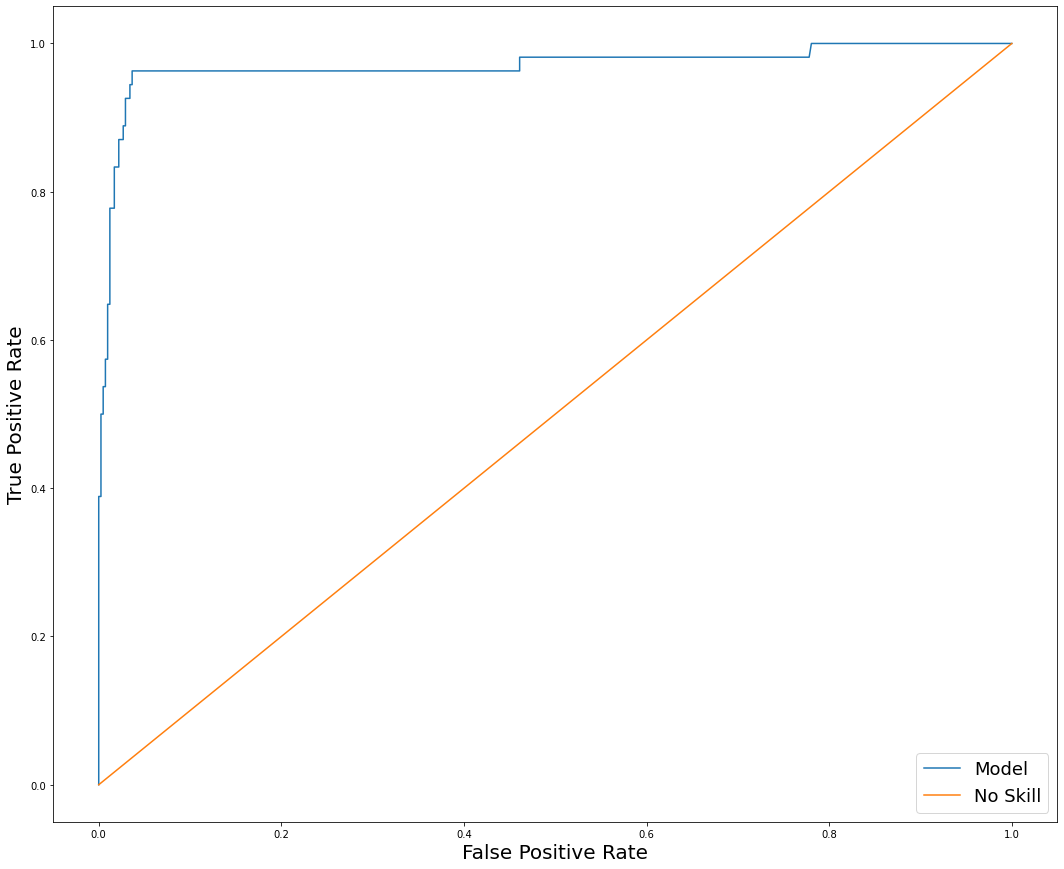

0.9693541102077686

In [ ]:
_ = model.predict(train_x)
print(see(train_y, _))
fp, tp , th = roc_curve(train_y, _)
fig = plt.figure(figsize=(18, 15))
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.plot(fp, tp, label='Model')
plt.plot([0, 1], [0, 1], label='No Skill')
plt.legend(fontsize=18)
plt.show()
fig.savefig('hmmm/line_train.jpg')
auc(fp, tp)

[[100   1]
 [  1  14]]
sp: 0.9900990099009901, sn: 0.9333333333333333, f69: 0.9608785175017158

MCC: 0.9234323432343234
0.9234323432343234


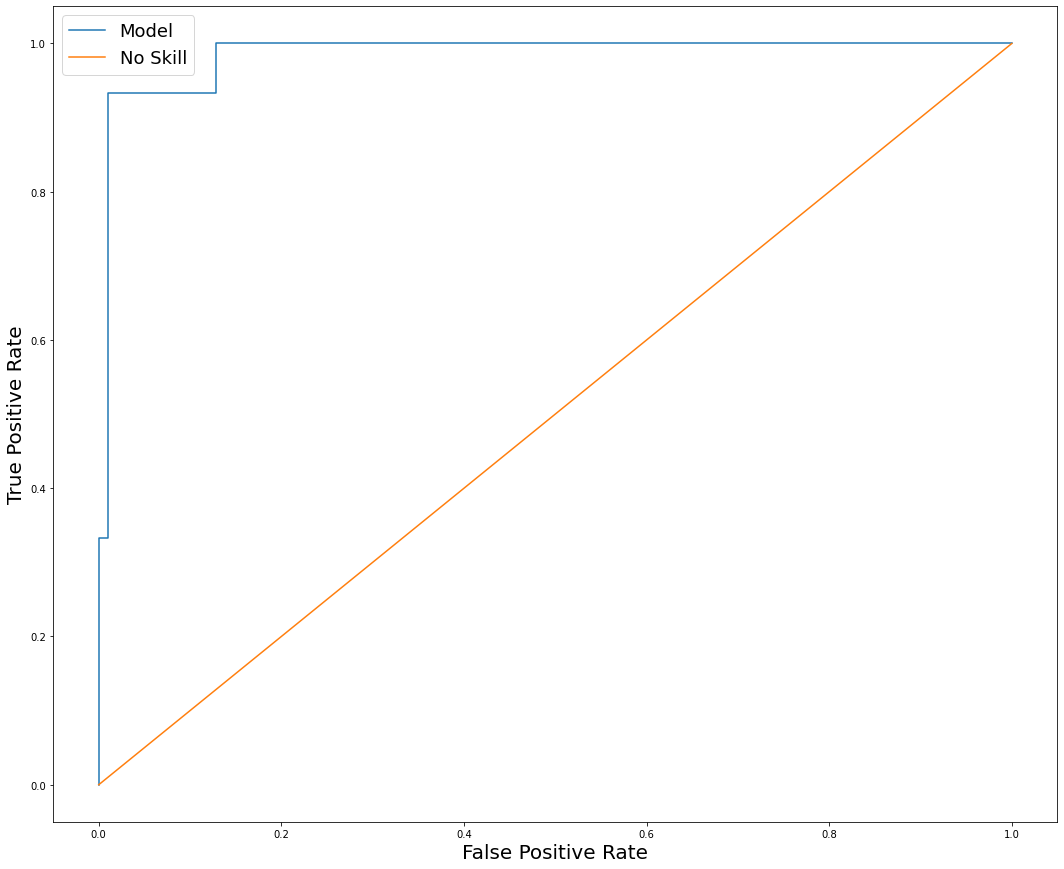

0.9854785478547855

In [ ]:
_ = model.predict(valid_x)
print(see(valid_y, _))
fp, tp , th = roc_curve(valid_y, _)
fig = plt.figure(figsize=(18, 15))
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.plot(fp, tp, label='Model')
plt.plot([0, 1], [0, 1], label='No Skill')
plt.legend(fontsize=18)
plt.show()
fig.savefig('hmmm/line_valid.jpg')
auc(fp, tp)

[[109  13]
 [  4  11]]
sp: 0.8934426229508197, sn: 0.7333333333333333, f69: 0.8055089015787705

MCC: 0.5148645975229023
0.5148645975229023


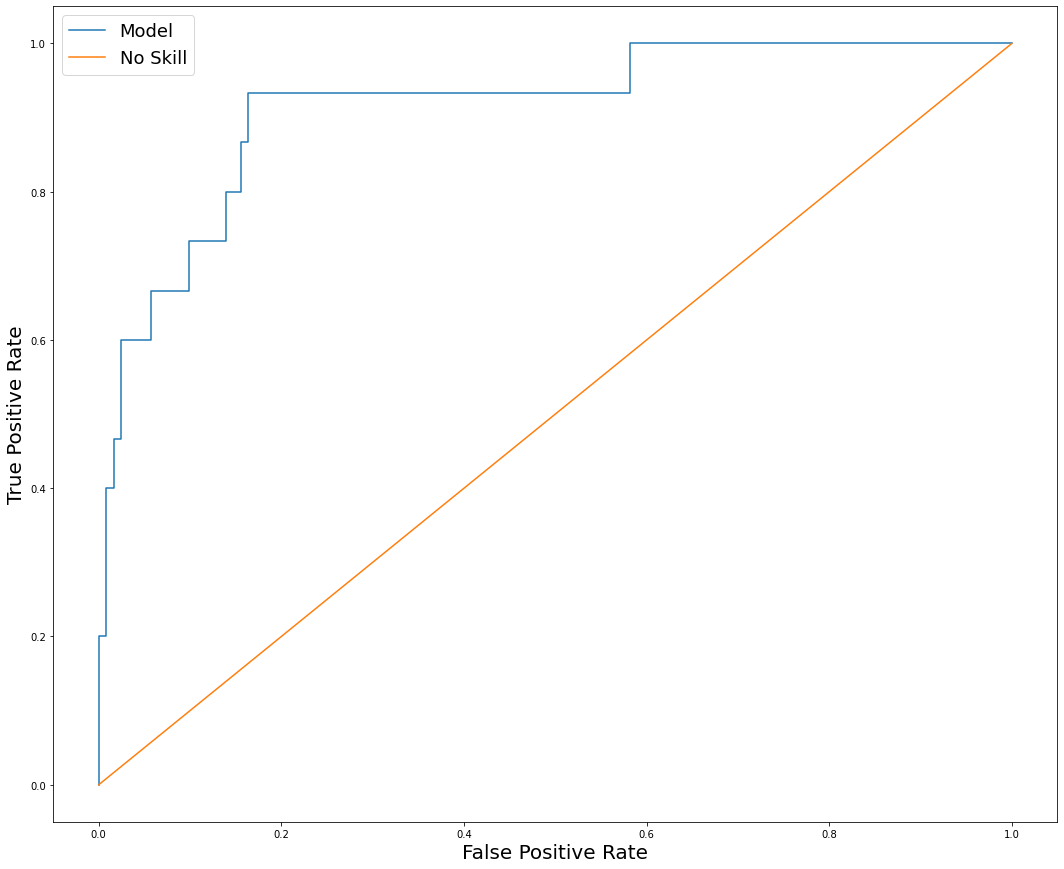

0.914207650273224

In [ ]:
_ = model.predict(test_x)
print(see(test_y, _))
fp, tp , th = roc_curve(test_y, _)
fig = plt.figure(figsize=(18, 15))
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.plot(fp, tp, label='Model')
plt.plot([0, 1], [0, 1], label='No Skill')
plt.legend(fontsize=18)
plt.show()
fig.savefig('hmmm/line_test.jpg')
auc(fp, tp)